<a href="https://colab.research.google.com/github/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/DrawChartsMassGathering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:orange">**Draw Charts Mass Gathering**</span>

In [3]:
!pip install google-api-python-client -q

## 1.1. **Draw Charts Mass Gathering**

Available Headers:
['time(s)', 'Duration(s)', 'ElapsedTime(s)', 'TotalPopulation', 'TotalInfected', 'Area(m²)', 'Density(p/m²)', 'TotalParticlesWake', 'TotalParticlesCircular', 'CalculateDecay', 'CharacteristicTime(s)', 'MotionRadius', 'Atleast1pWake', 'Atleast1pCircular', 'ParticlesWakeMax', 'ParticlesWakeMean', 'ParticlesWakeMin', 'ParticlesWakeMedian', 'ParticlesWakeMode', 'ParticlesWakeVariance', 'ParticlesWakeSkewness', 'ParticlesWakeKurtosis', 'ParticlesCircularMax', 'ParticlesCircularMean', 'ParticlesCircularMin', 'ParticlesCircularMedian', 'ParticlesCircularMode', 'ParticlesCircularVariance', 'ParticlesCircularSkewness', 'ParticlesCircularKurtosis', 'MaxPDFPathogensWake', 'MaxPDFPathogensCircular', 'ParticlesWakeNZeroMax', 'ParticlesWakeNZeroMean', 'ParticlesWakeNZeroMin', 'ParticlesWakeNZeroMedian', 'ParticlesWakeNZeroMode', 'ParticlesWakeNZeroVariance', 'ParticlesWakeNZeroSkewness', 'ParticlesWakeNZeroKurtosis', 'ParticlesCircularNZeroMax', 'ParticlesCircularNZeroMean', 'Part

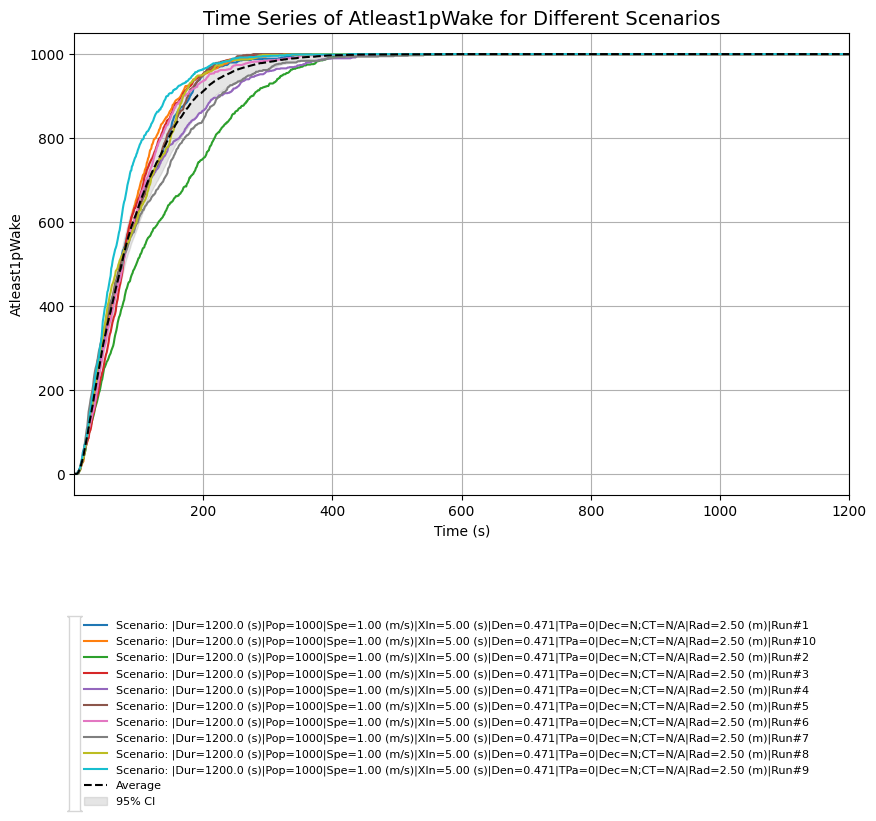

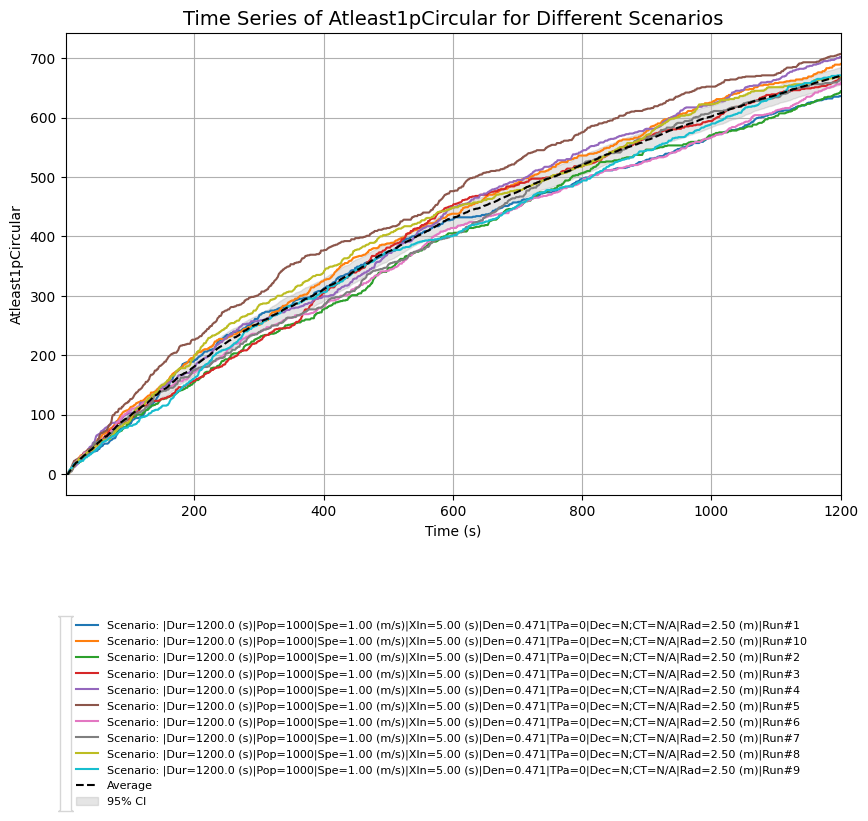

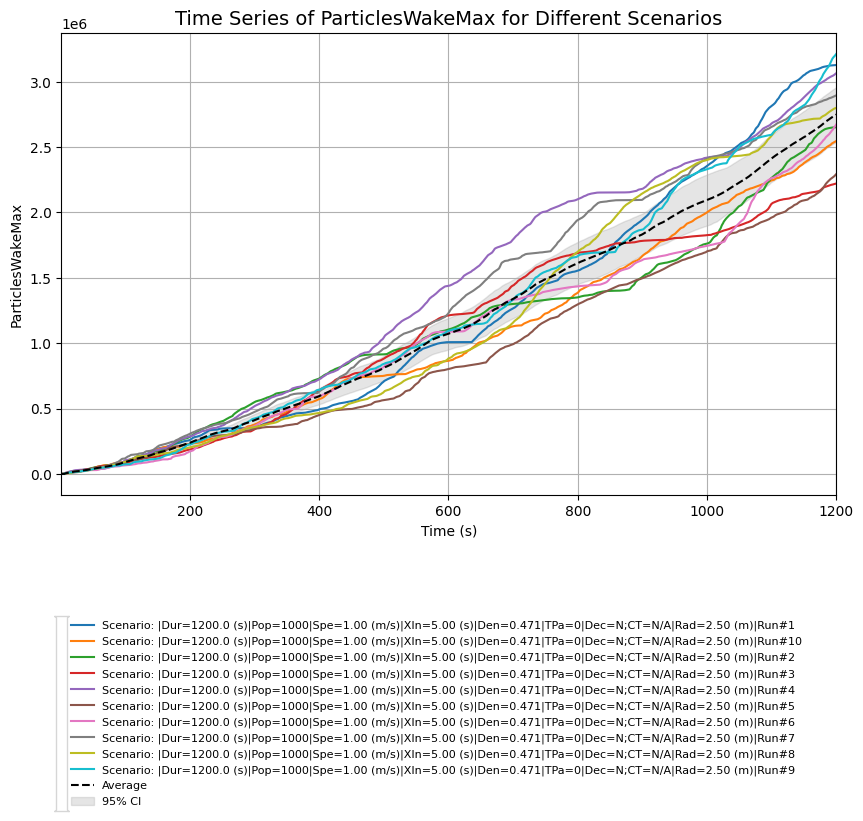

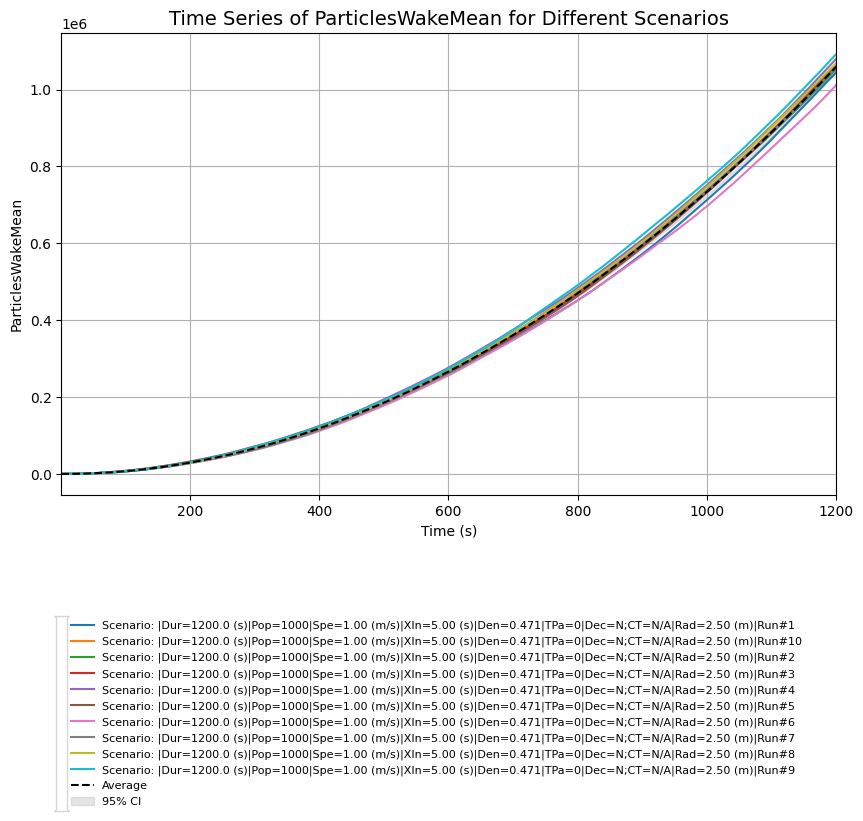

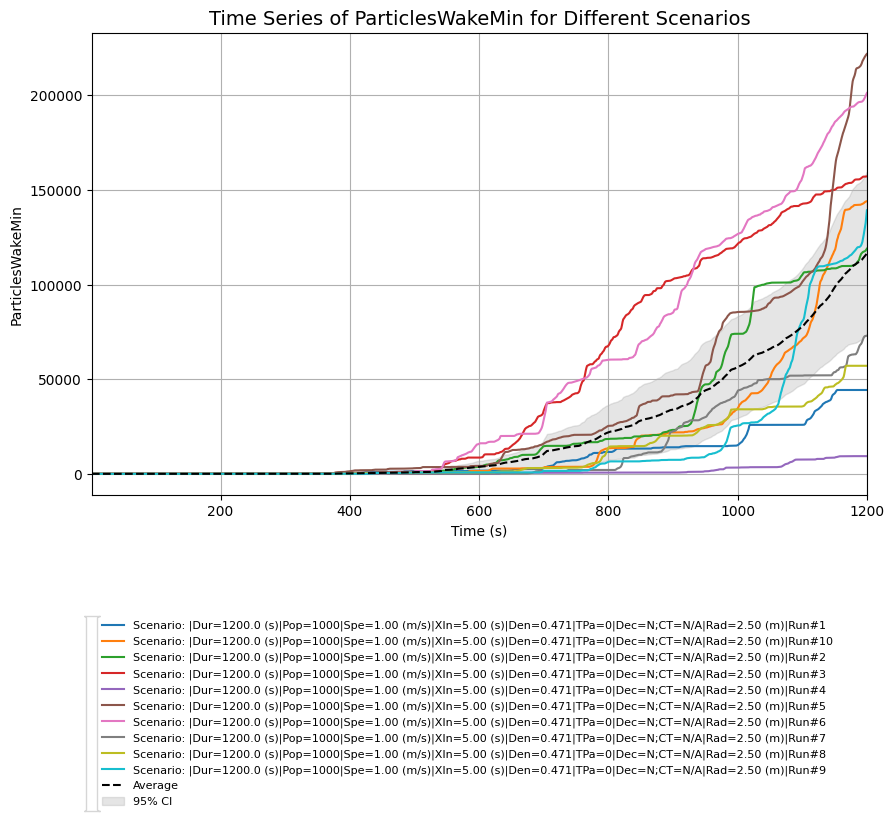

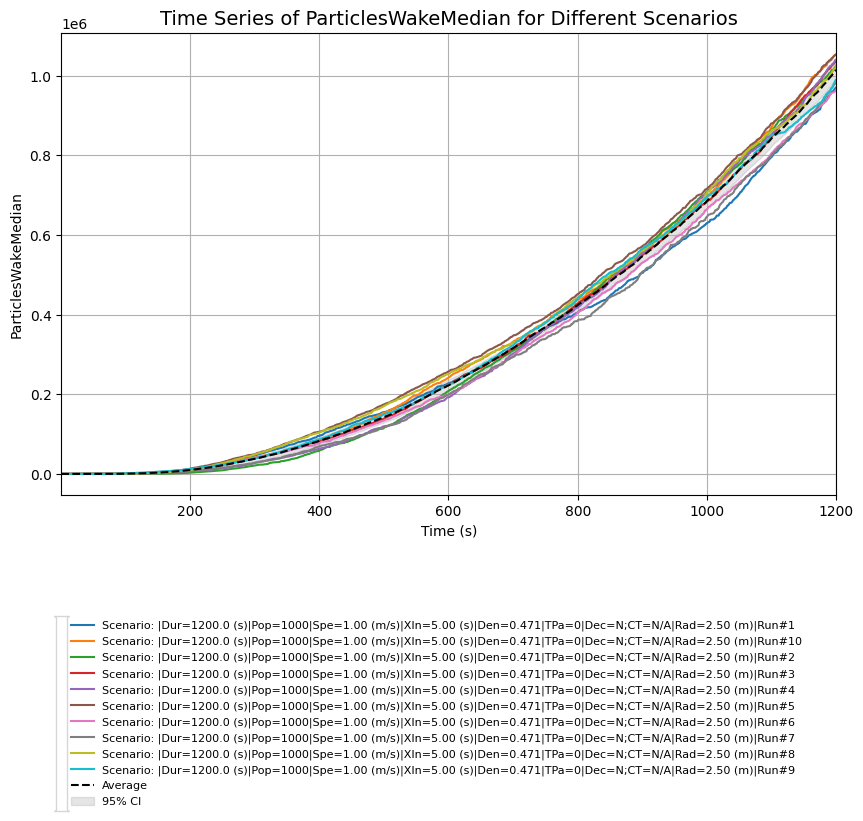

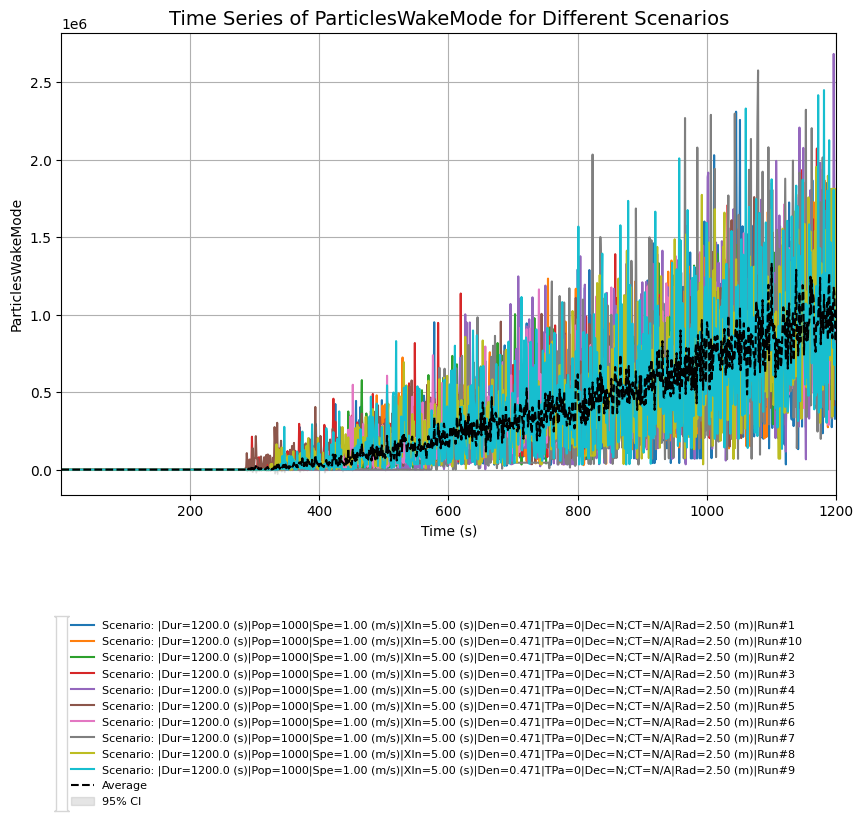

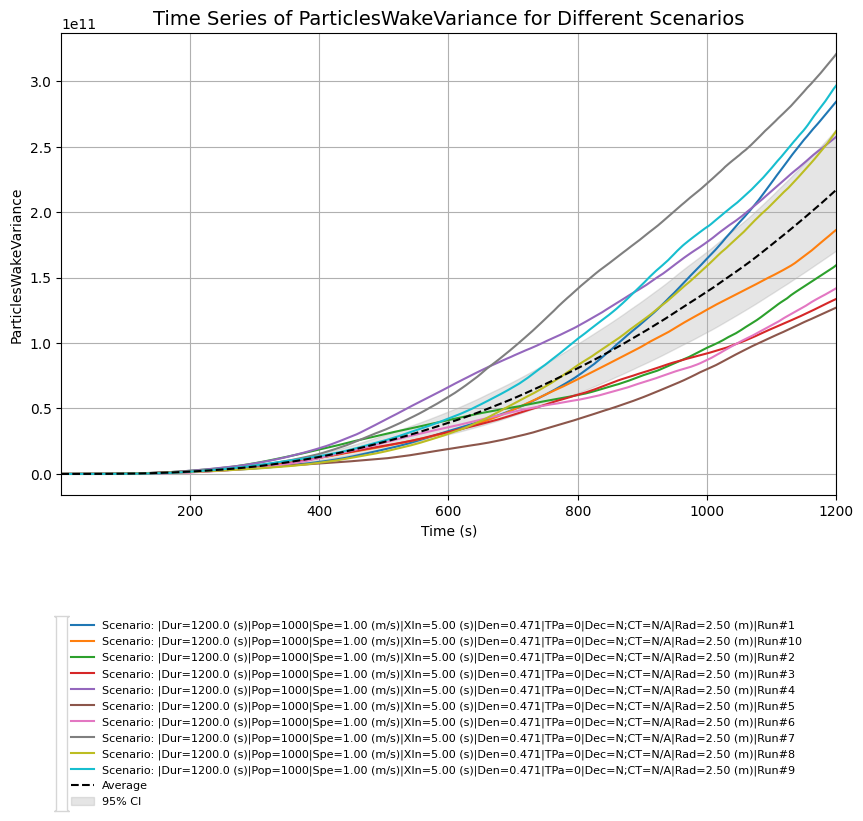

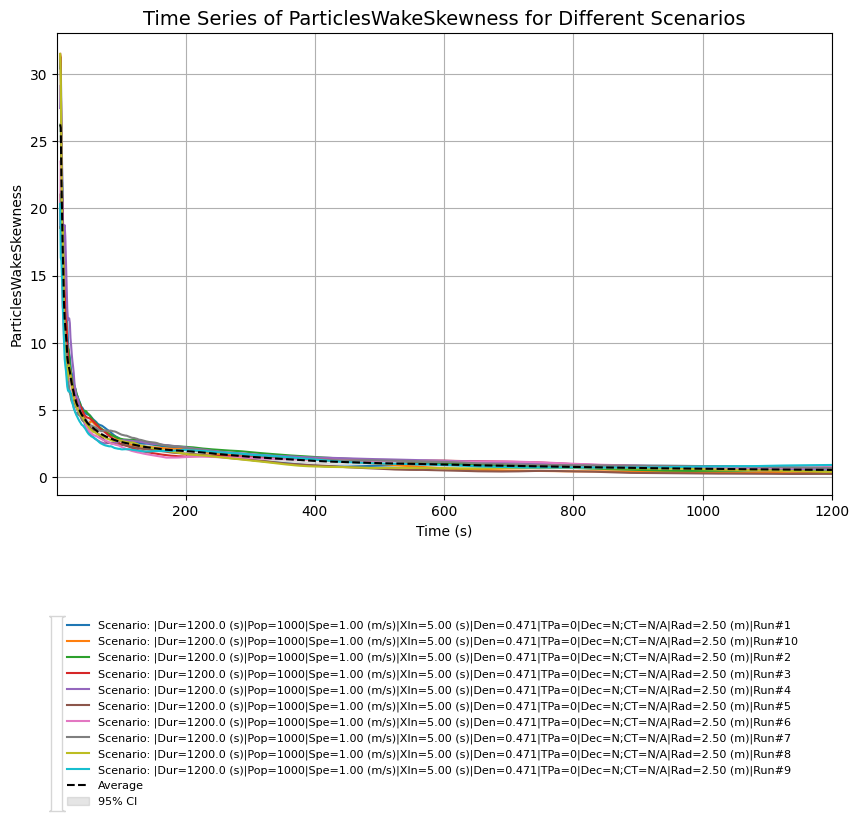

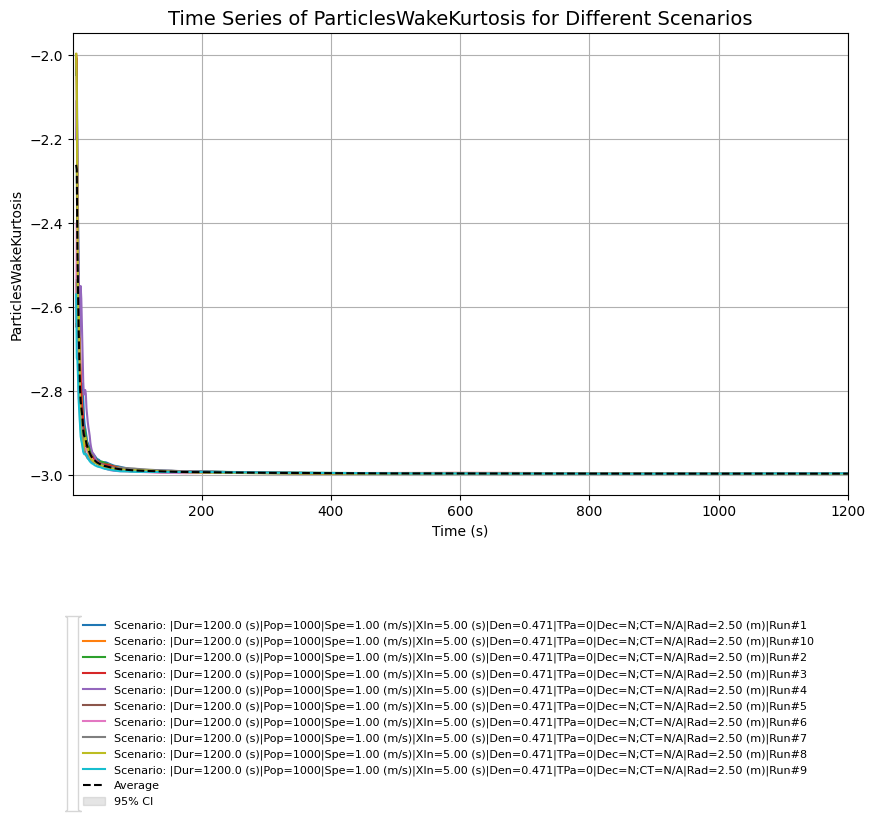

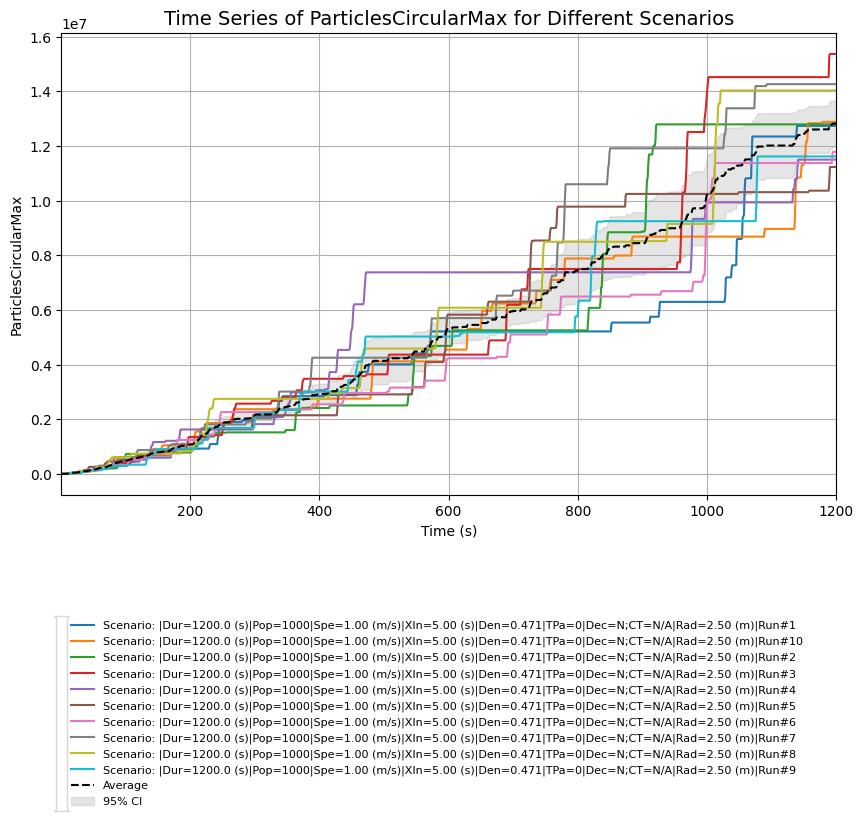

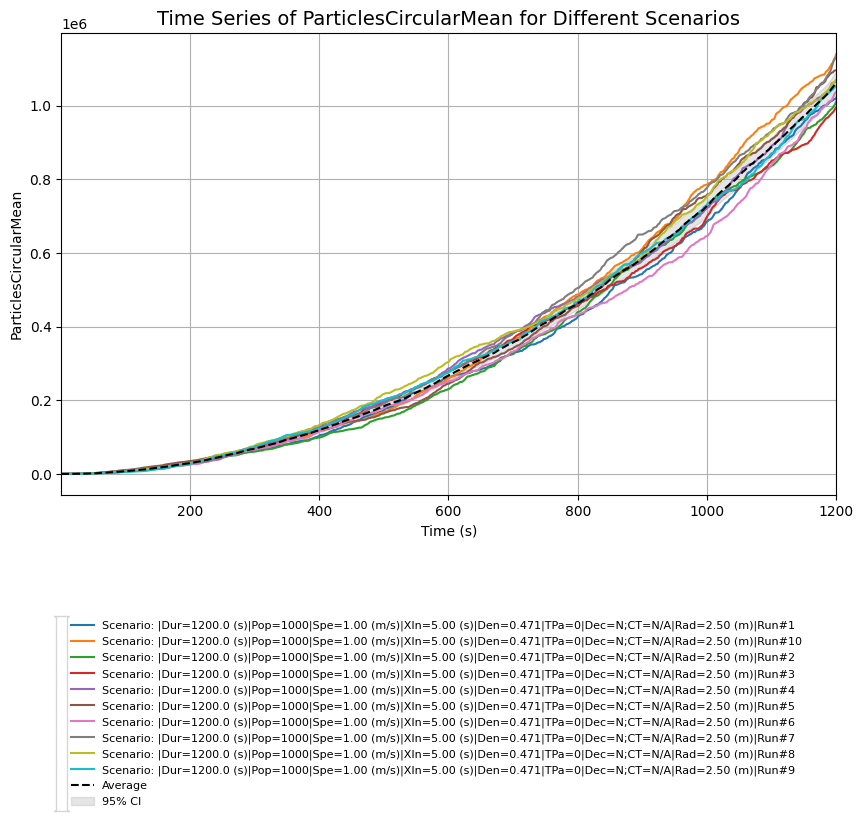

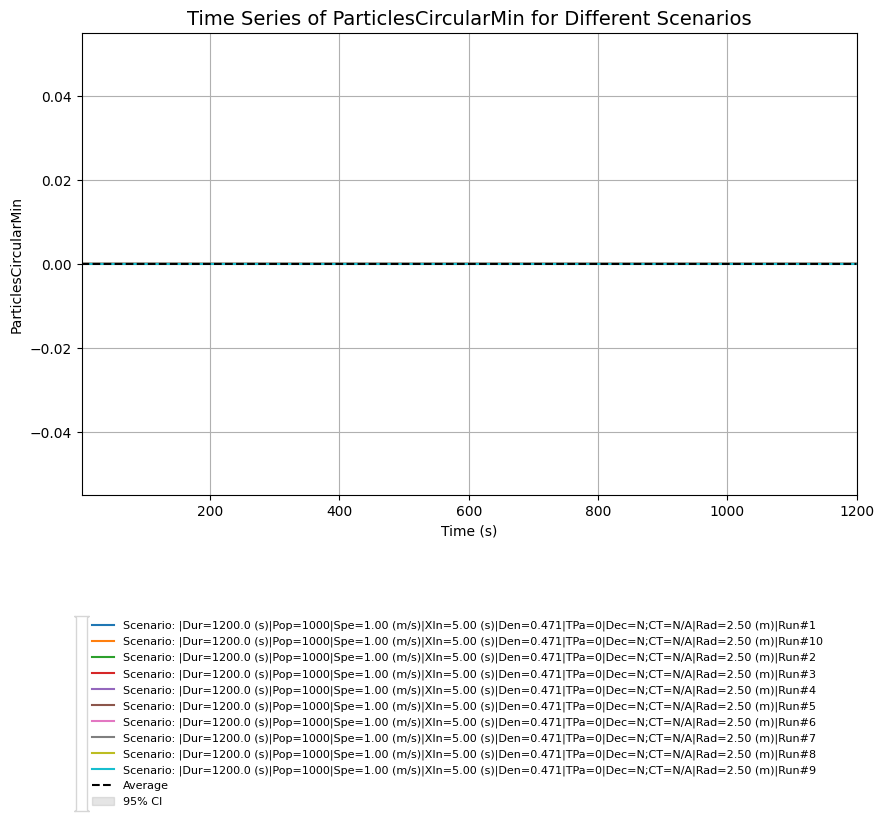

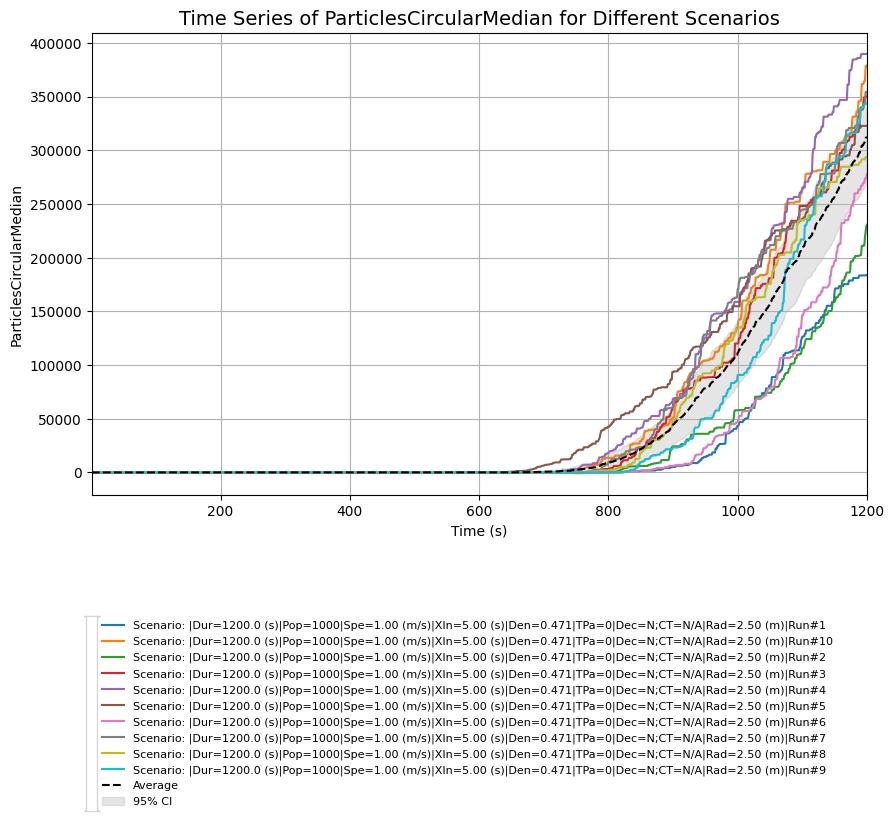

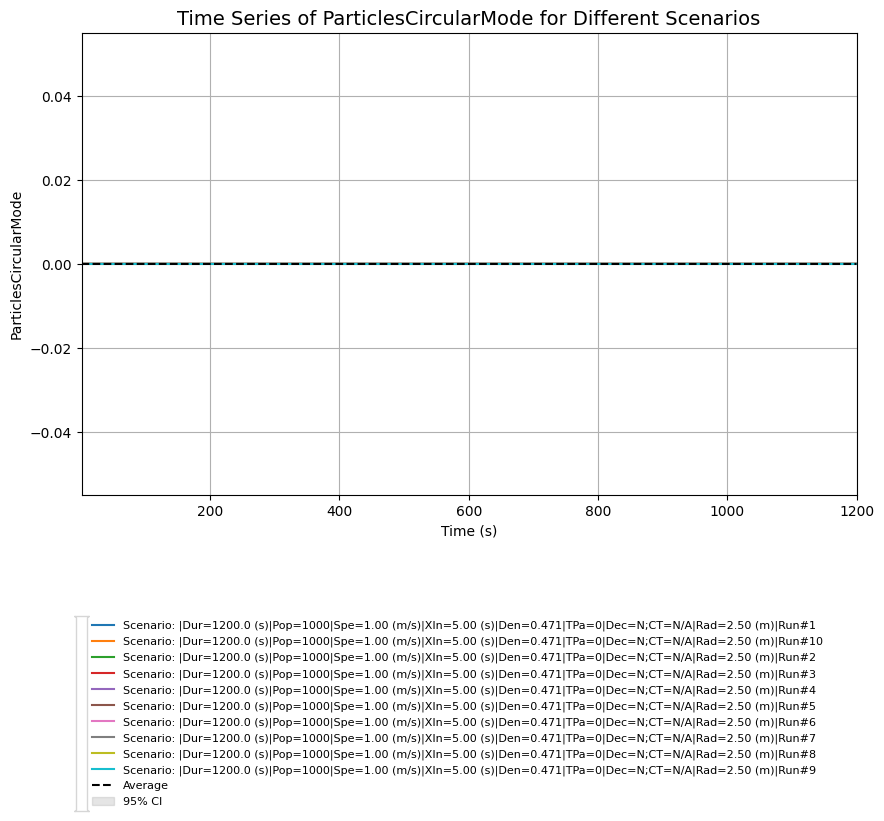

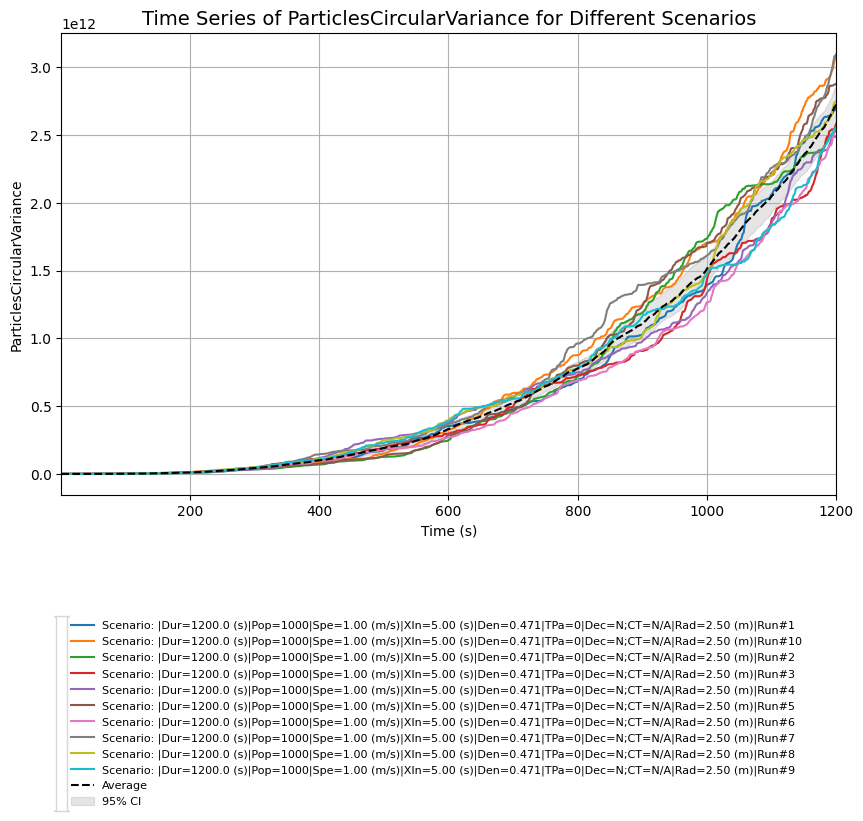

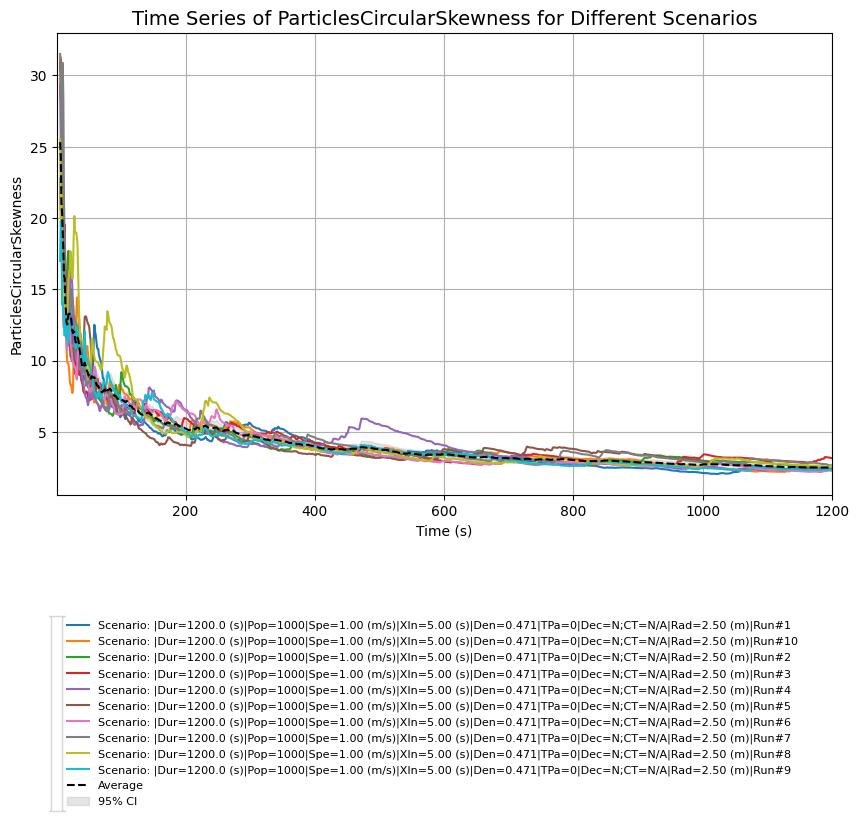

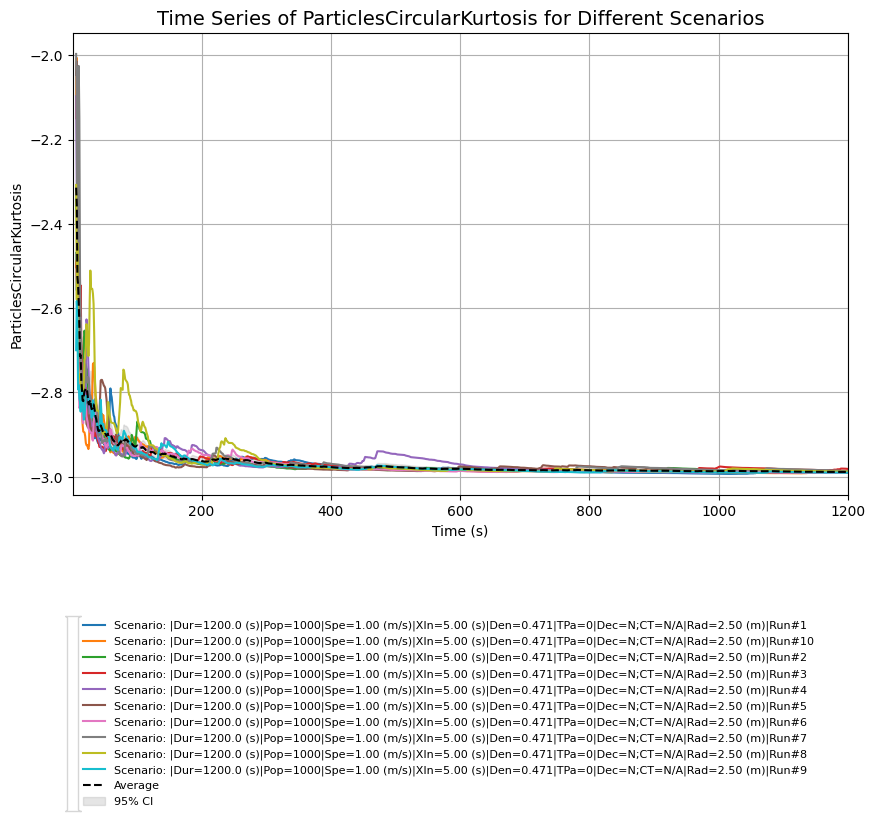

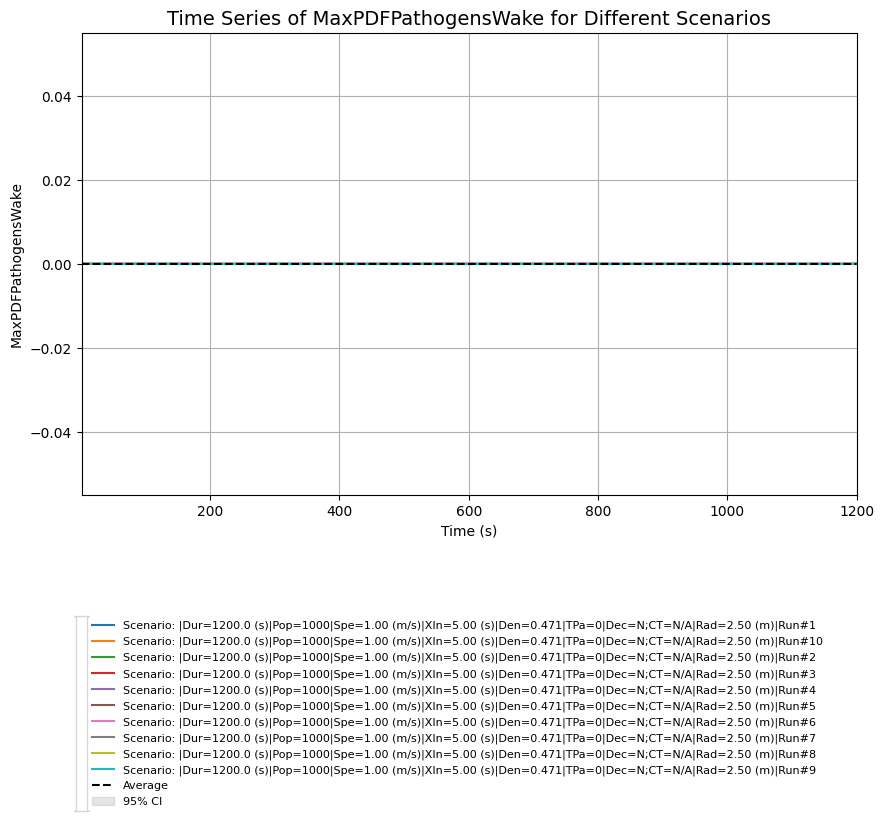

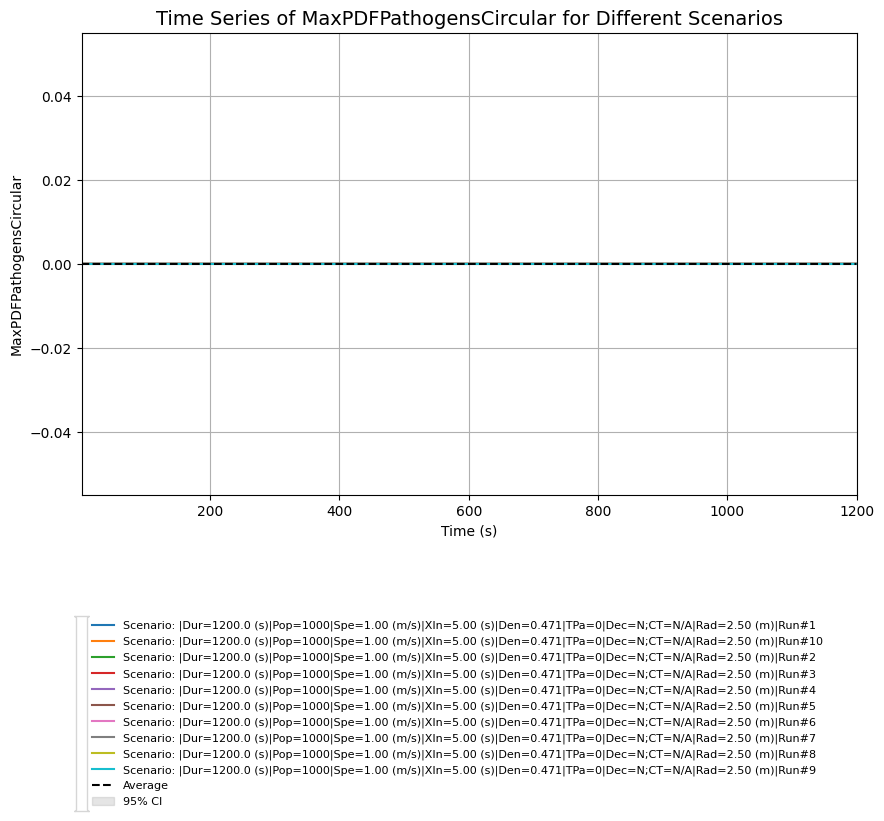

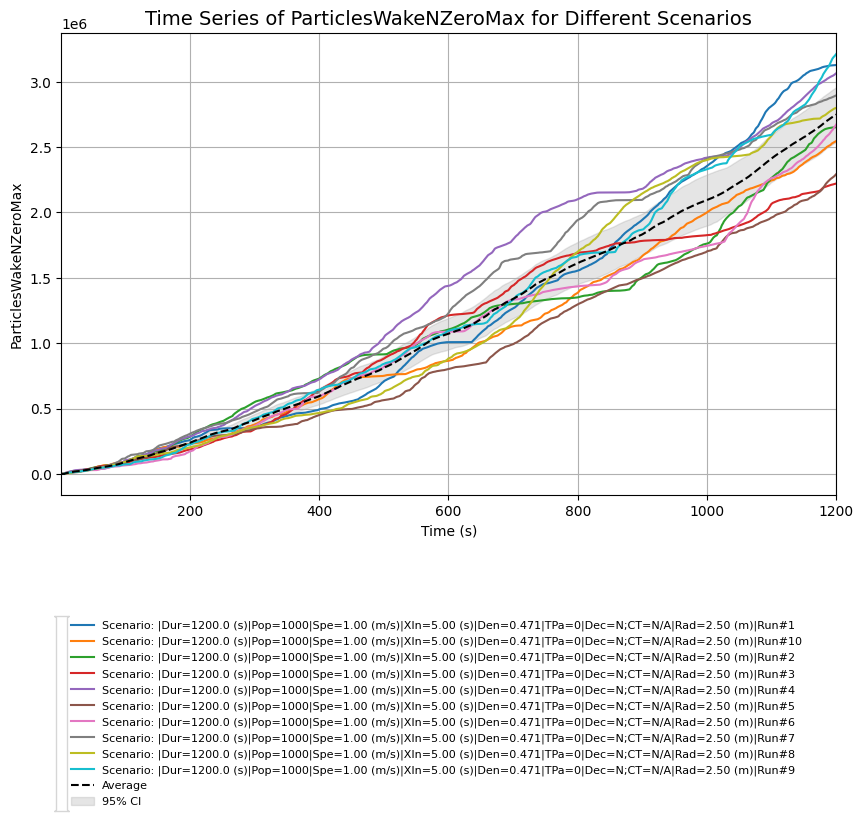

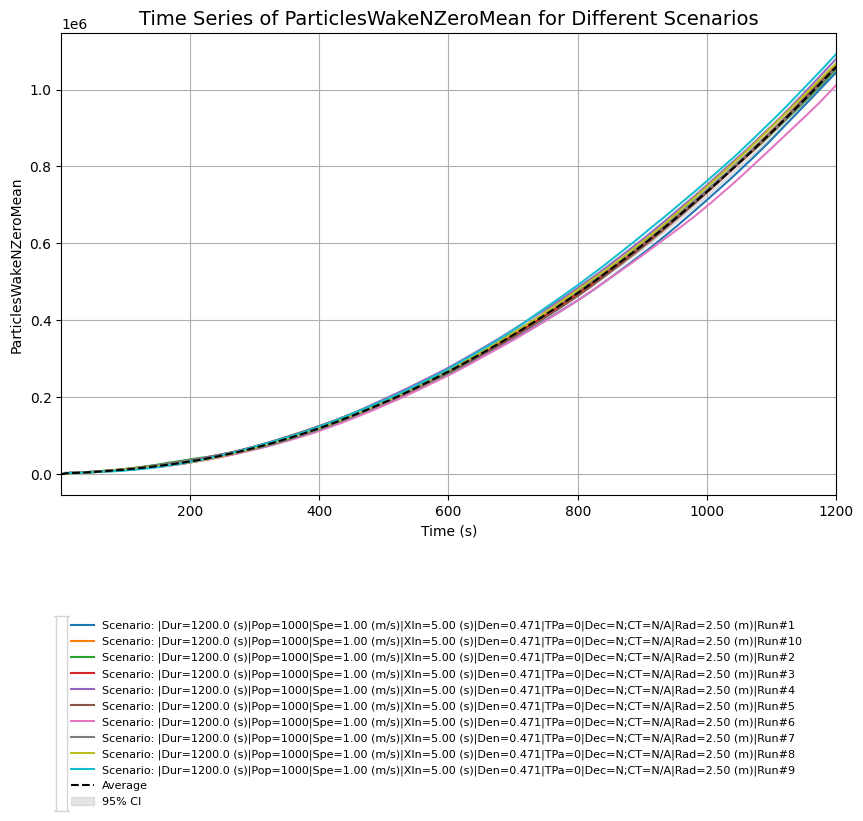

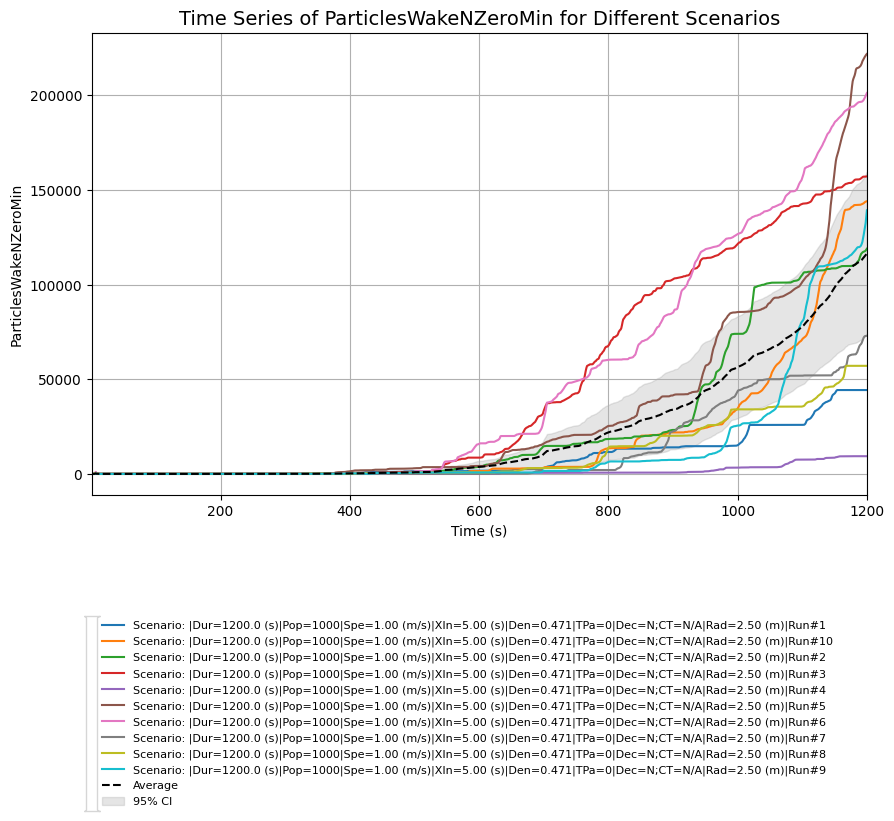

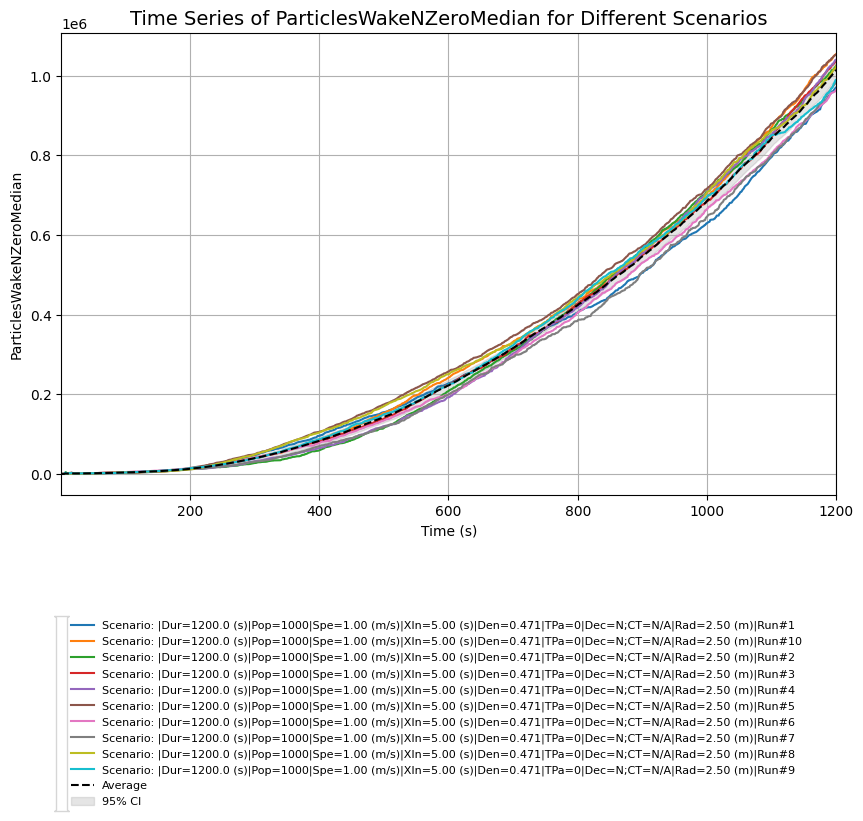

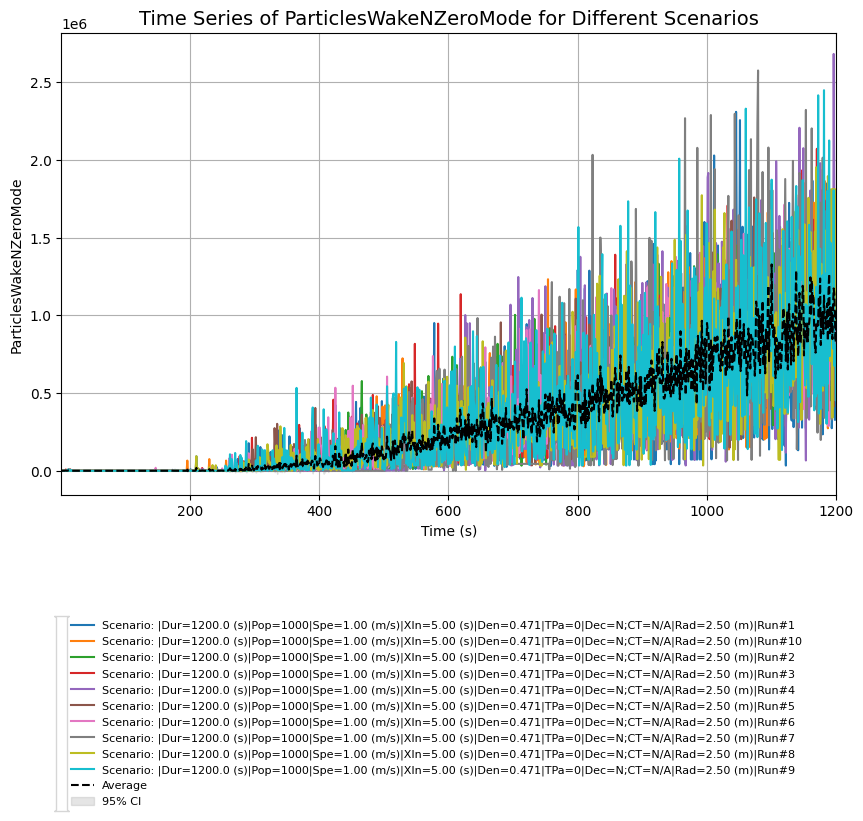

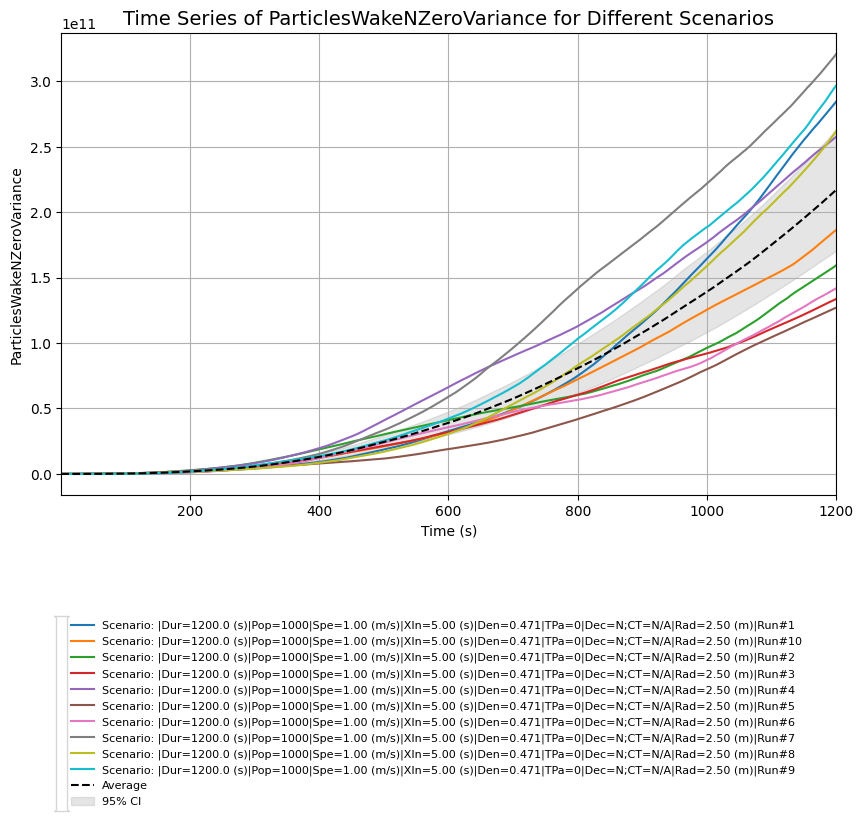

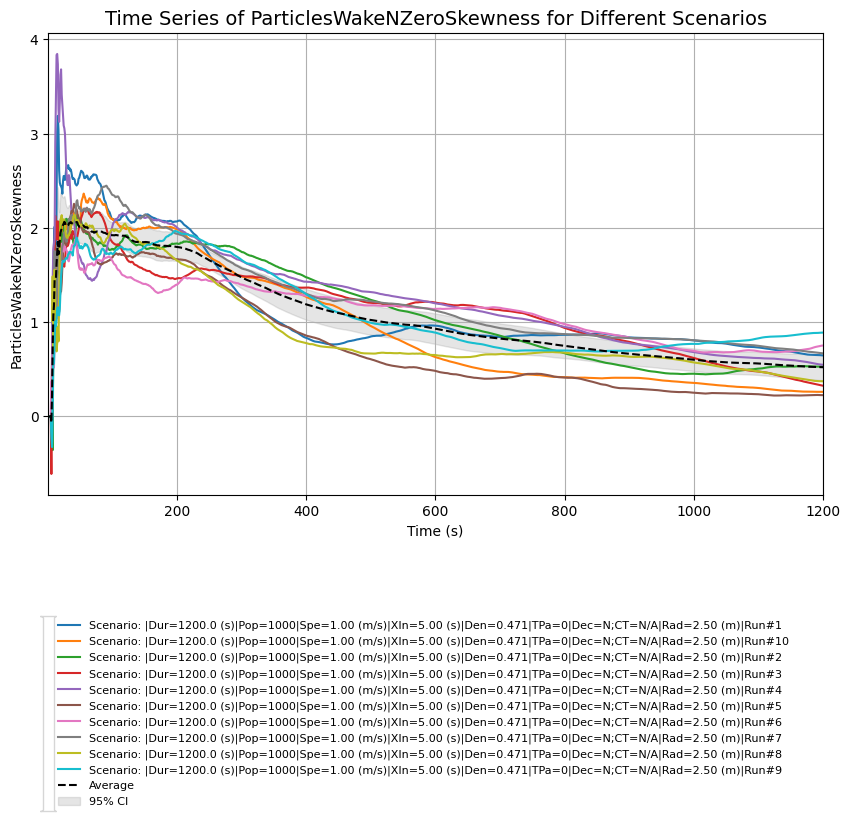

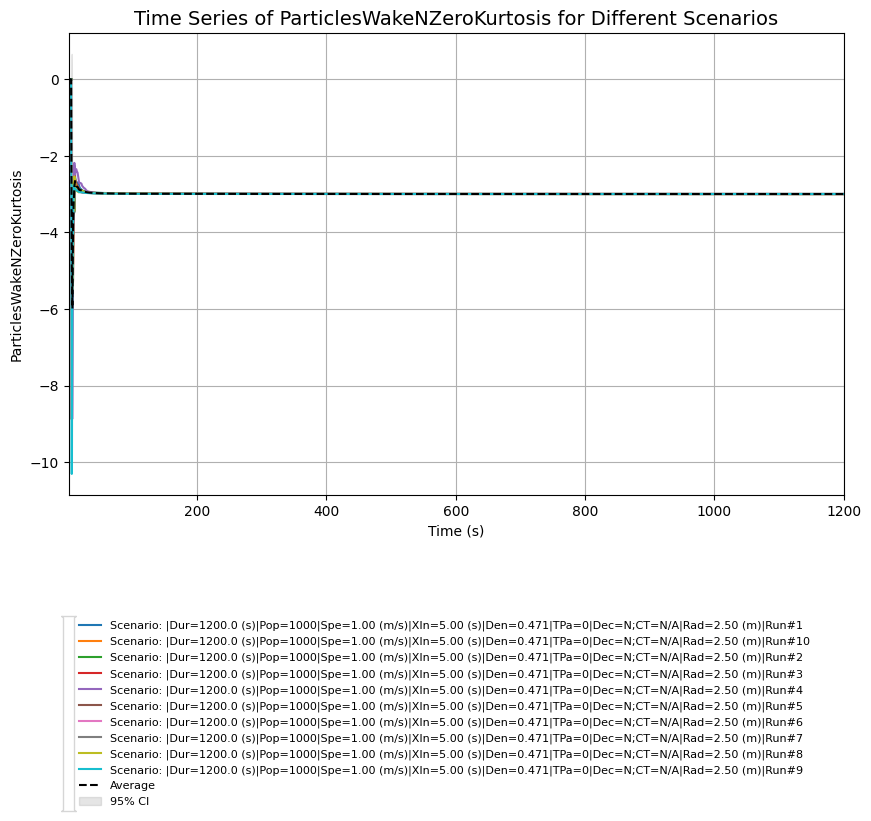

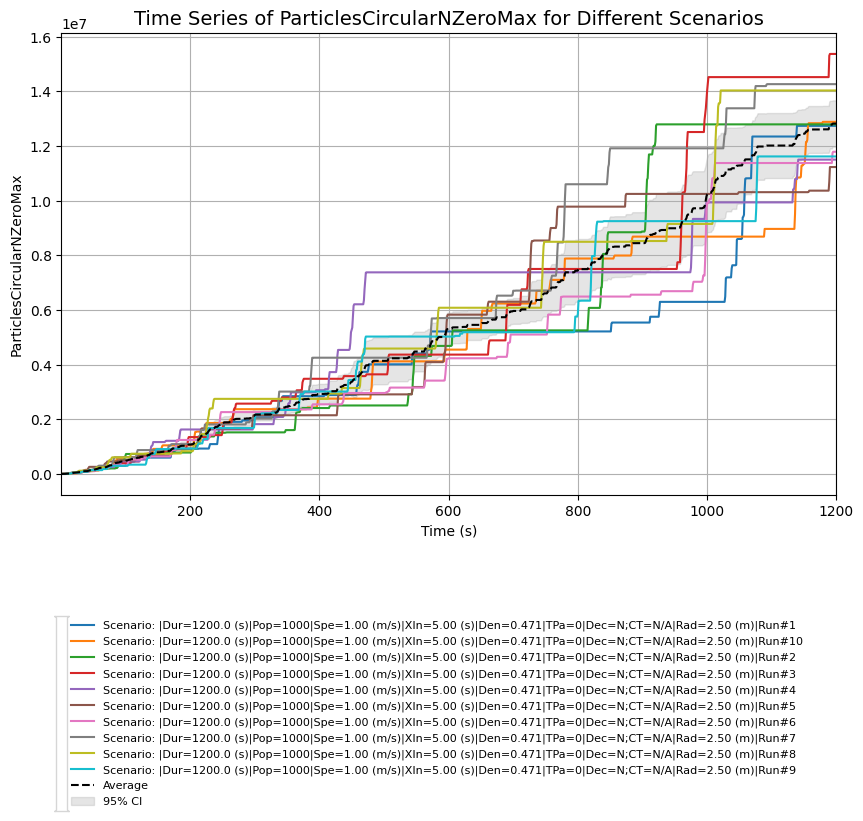

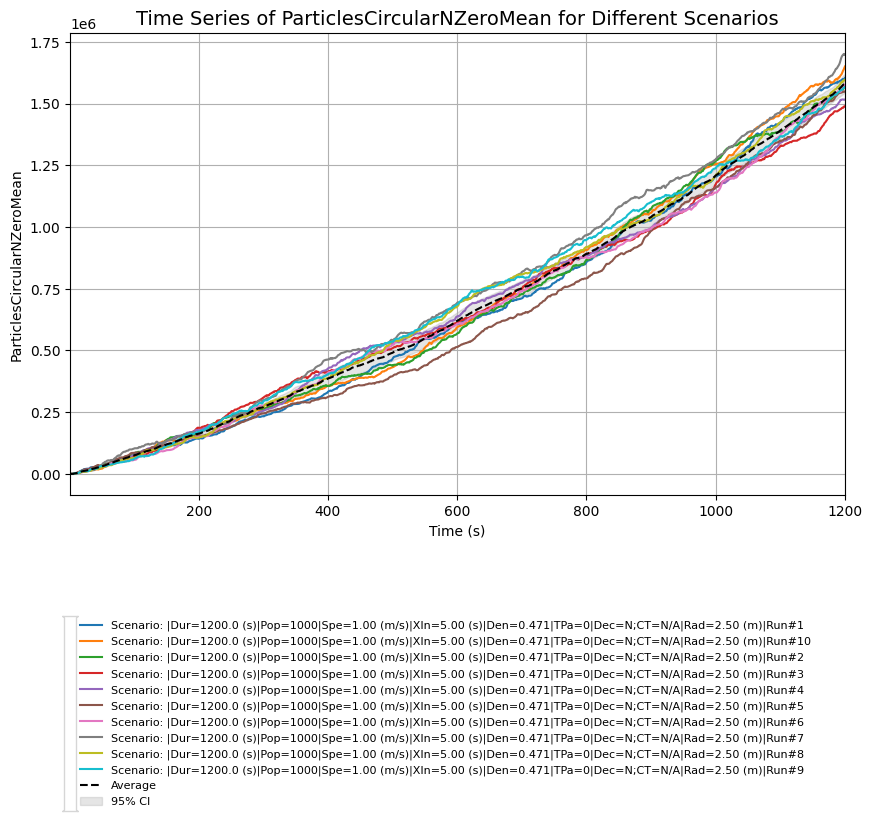

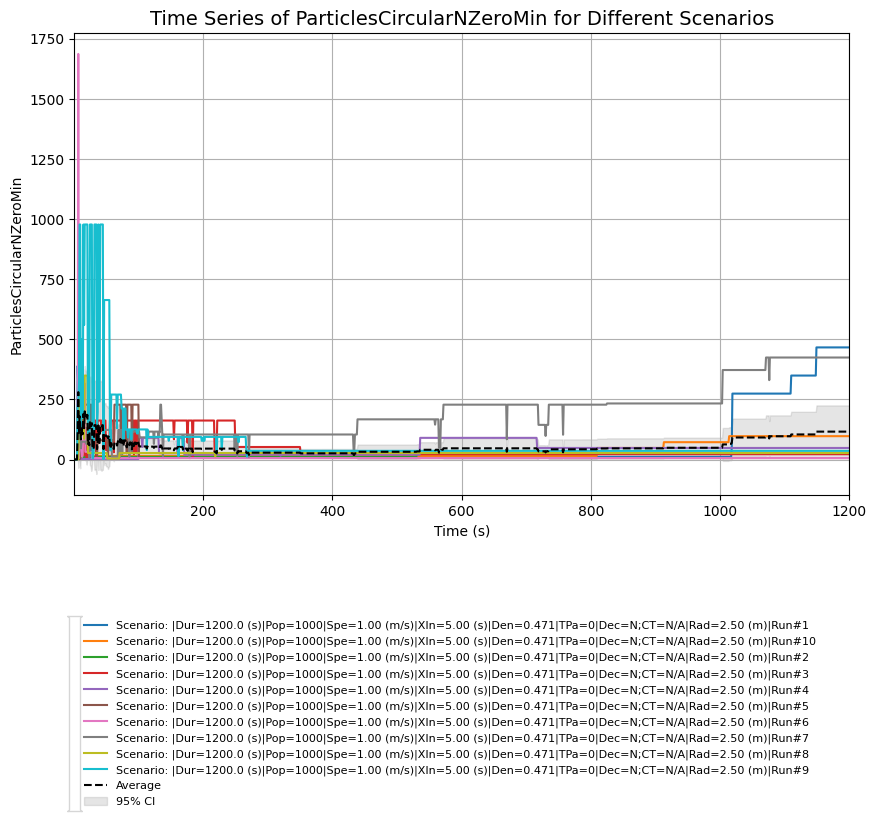

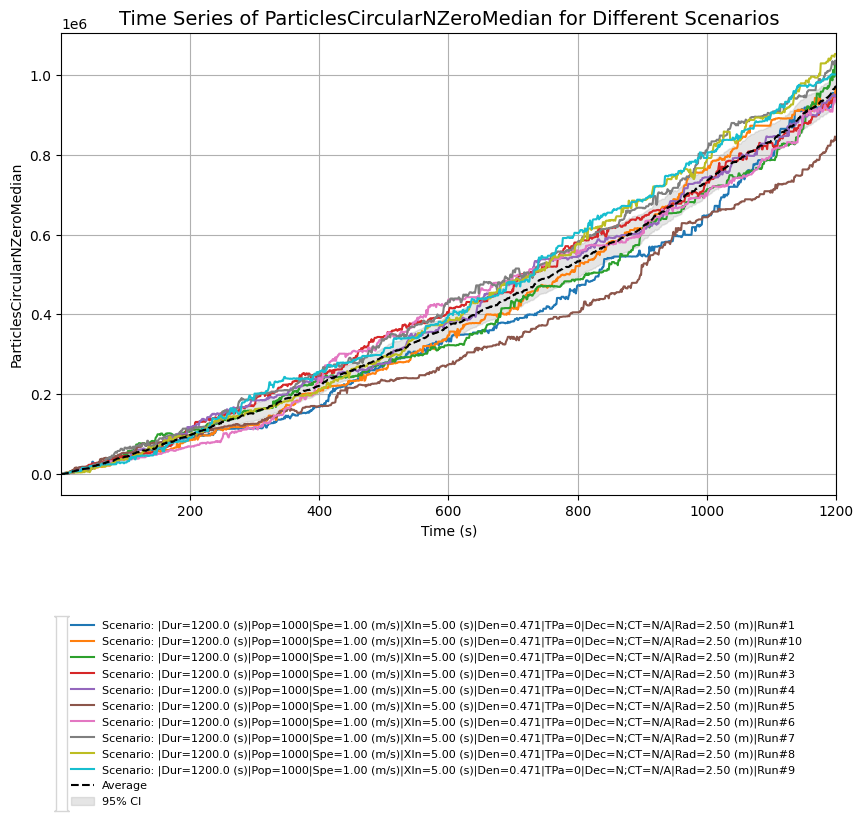

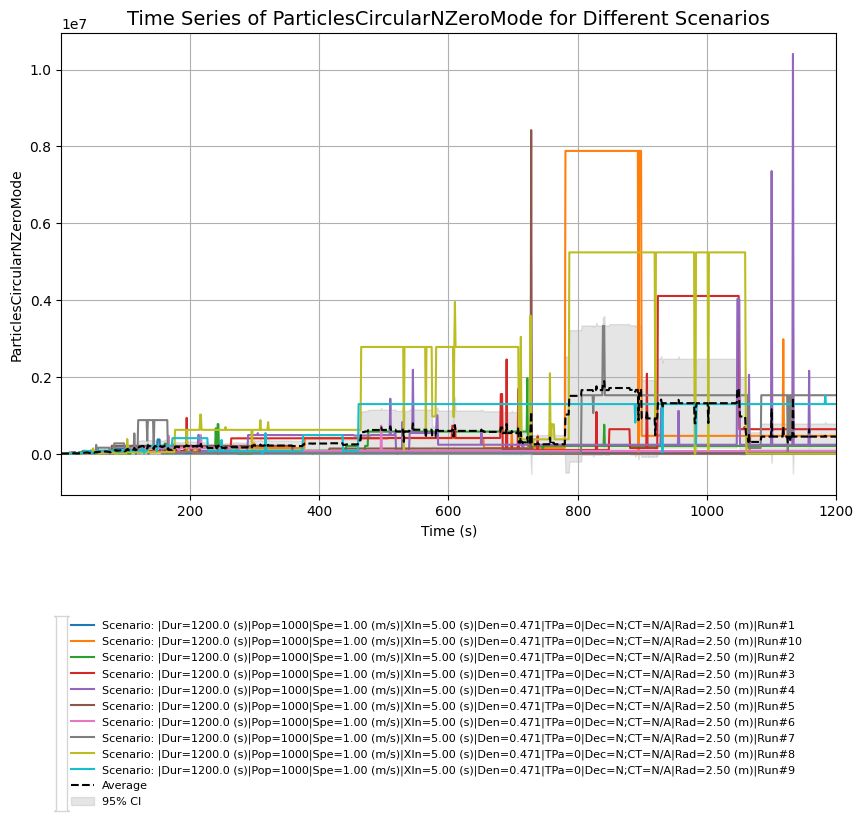

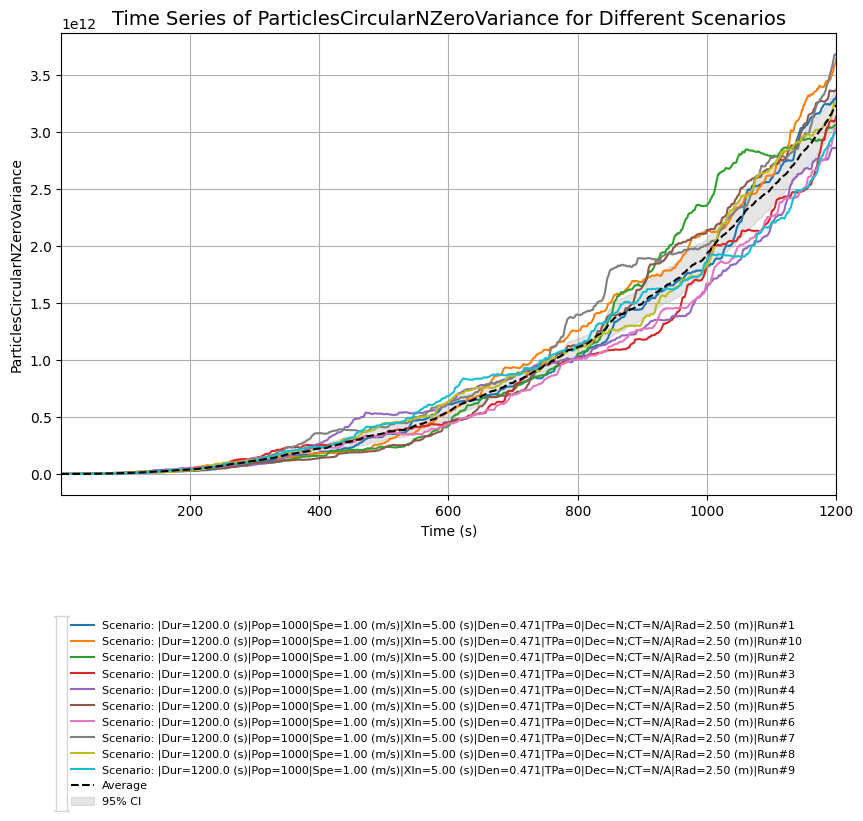

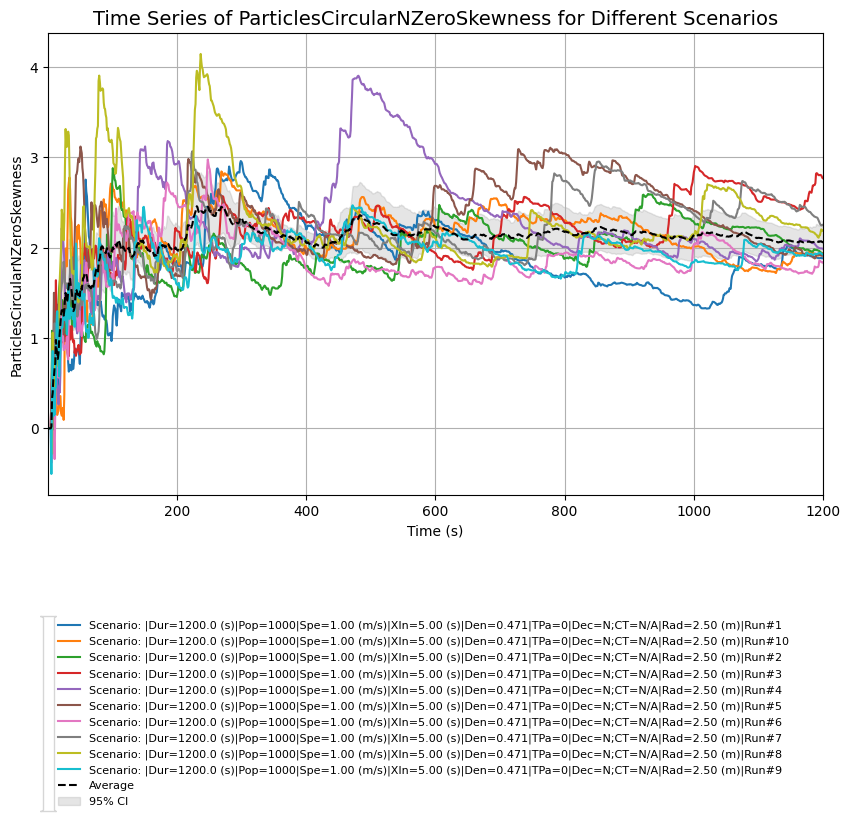

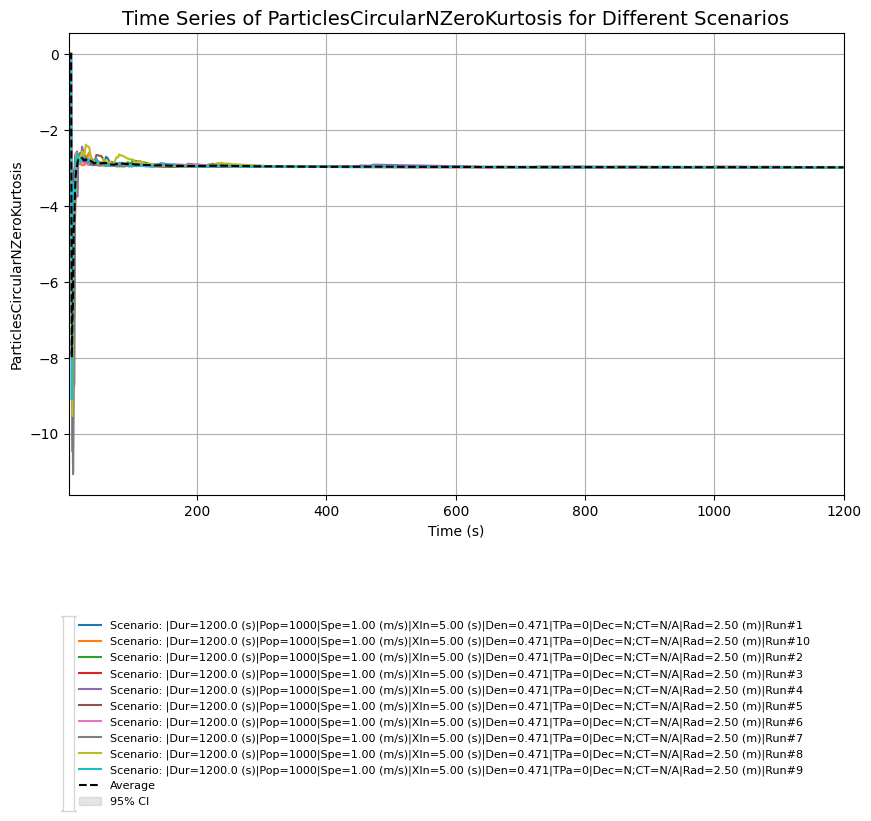

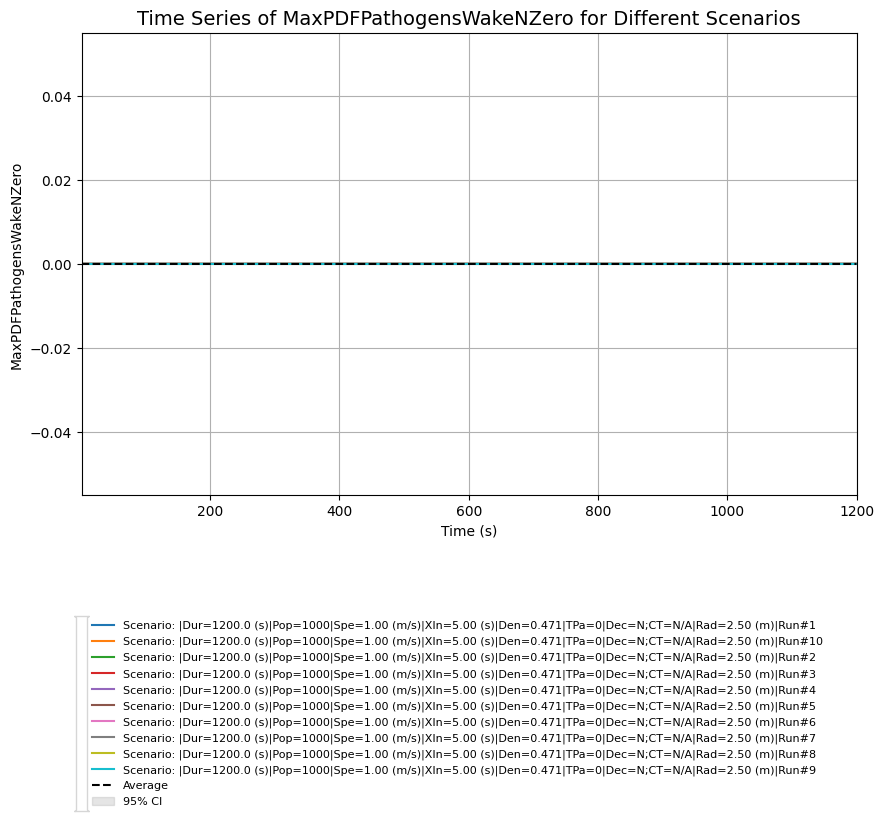

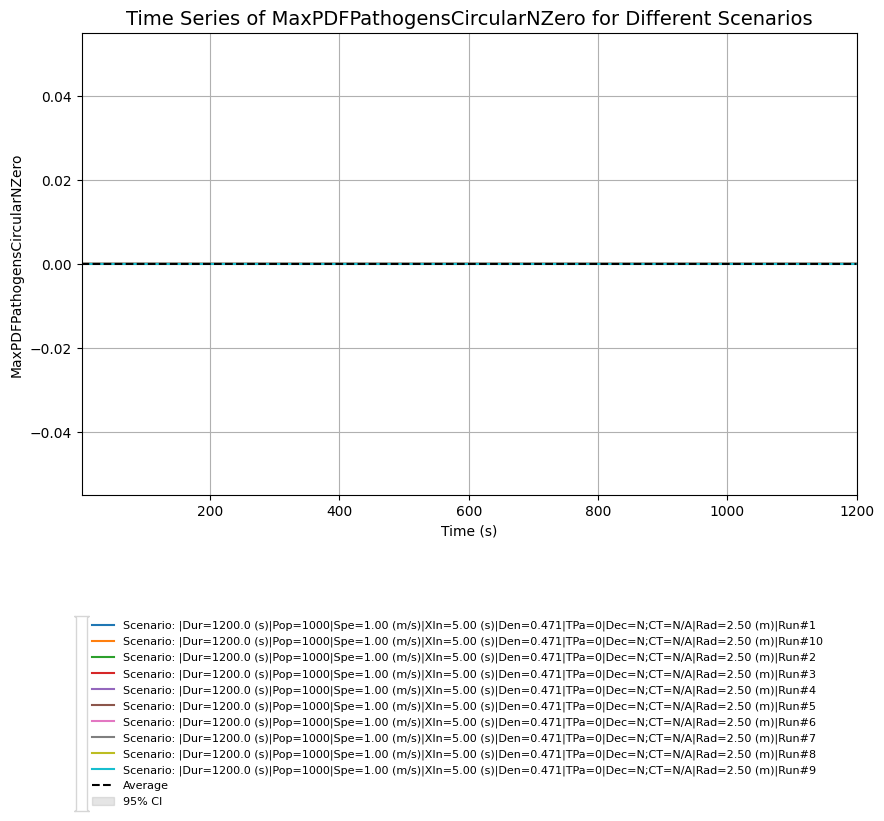

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/resultsLoggerTimeseries.xlsx?raw=true'
df = pd.read_excel(excel_file)

# Print available headers
print("Available Headers:")
print(df.columns.tolist())

# Get unique scenarios
scenarios = df['Title'].unique()

# List of headers to plot
headers_to_plot = ['Atleast1pWake', 'Atleast1pCircular',
                   'ParticlesWakeMax', 'ParticlesWakeMean', 'ParticlesWakeMin', 'ParticlesWakeMedian', 'ParticlesWakeMode',
                   'ParticlesWakeVariance', 'ParticlesWakeSkewness', 'ParticlesWakeKurtosis',
                   'ParticlesCircularMax', 'ParticlesCircularMean', 'ParticlesCircularMin', 'ParticlesCircularMedian', 'ParticlesCircularMode',
                   'ParticlesCircularVariance', 'ParticlesCircularSkewness', 'ParticlesCircularKurtosis',
                   'MaxPDFPathogensWake', 'MaxPDFPathogensCircular',
                   'ParticlesWakeNZeroMax', 'ParticlesWakeNZeroMean', 'ParticlesWakeNZeroMin', 'ParticlesWakeNZeroMedian', 'ParticlesWakeNZeroMode',
                   'ParticlesWakeNZeroVariance', 'ParticlesWakeNZeroSkewness', 'ParticlesWakeNZeroKurtosis',
                   'ParticlesCircularNZeroMax', 'ParticlesCircularNZeroMean', 'ParticlesCircularNZeroMin', 'ParticlesCircularNZeroMedian', 'ParticlesCircularNZeroMode',
                   'ParticlesCircularNZeroVariance', 'ParticlesCircularNZeroSkewness', 'ParticlesCircularNZeroKurtosis',
                   'MaxPDFPathogensWakeNZero', 'MaxPDFPathogensCircularNZero'
]

# Plotting each header in separate charts
for header in headers_to_plot:
    if header in df.columns:  # Check if header is present in the DataFrame
        plt.figure(figsize=(10, 6))
        for scenario in scenarios:
            scenario_data = df[df['Title'] == scenario]
            if not scenario_data.empty:  # Check if DataFrame contains data for the scenario
                plt.plot(scenario_data['time(s)'], scenario_data[header], label=f'Scenario: {scenario}')

        # Calculate average, standard deviation, and confidence interval
        average_values = df.groupby('time(s)')[header].mean()
        std_values = df.groupby('time(s)')[header].std()
        confidence_interval = 1.96 * std_values / np.sqrt(df.groupby('time(s)')[header].count())

        # Plot average line with shaded confidence interval
        plt.plot(average_values.index, average_values, color='black', linestyle='--', label='Average')
        plt.fill_between(average_values.index, average_values - confidence_interval, average_values + confidence_interval, color='gray', alpha=0.2, label='95% CI')

        plt.xlabel('Time (s)')
        plt.ylabel(header)
        plt.title(f'Time Series of {header} for Different Scenarios', fontsize=14)
        plt.legend(loc='upper center', bbox_to_anchor=(0, -0.25), ncol=1, mode='expand', fontsize=8)
        plt.grid(True)
        plt.xlim(df['time(s)'].min(), df['time(s)'].max())
        plt.show()
    else:
        print(f"Header '{header}' not found in the DataFrame. Skipping plotting for this header.")

## 1.2. **Save Charts Mass Gathering**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the Excel file
excel_file = 'https://github.com/mtofighi/ChilwaBasin/blob/main/DrawChartsMassGathering/Data/resultsLoggerTimeseries.xlsx?raw=true'
df = pd.read_excel(excel_file)

# Print available headers
print("Available Headers:")
print(df.columns.tolist())

# Get unique scenarios
scenarios = df['Title'].unique()

# List of headers to plot
headers_to_plot = ['Atleast1pWake', 'Atleast1pCircular',
                   'ParticlesWakeMax', 'ParticlesWakeMean', 'ParticlesWakeMin', 'ParticlesWakeMedian', 'ParticlesWakeMode',
                   'ParticlesWakeVariance', 'ParticlesWakeSkewness', 'ParticlesWakeKurtosis',
                   'ParticlesCircularMax', 'ParticlesCircularMean', 'ParticlesCircularMin', 'ParticlesCircularMedian', 'ParticlesCircularMode',
                   'ParticlesCircularVariance', 'ParticlesCircularSkewness', 'ParticlesCircularKurtosis',
                   'MaxPDFPathogensWake', 'MaxPDFPathogensCircular',
                   'ParticlesWakeNZeroMax', 'ParticlesWakeNZeroMean', 'ParticlesWakeNZeroMin', 'ParticlesWakeNZeroMedian', 'ParticlesWakeNZeroMode',
                   'ParticlesWakeNZeroVariance', 'ParticlesWakeNZeroSkewness', 'ParticlesWakeNZeroKurtosis',
                   'ParticlesCircularNZeroMax', 'ParticlesCircularNZeroMean', 'ParticlesCircularNZeroMin', 'ParticlesCircularNZeroMedian', 'ParticlesCircularNZeroMode',
                   'ParticlesCircularNZeroVariance', 'ParticlesCircularNZeroSkewness', 'ParticlesCircularNZeroKurtosis',
                   'MaxPDFPathogensWakeNZero', 'MaxPDFPathogensCircularNZero'
]

# Create a folder to save the images
image_folder = '/content/plots'
os.makedirs(image_folder, exist_ok=True)

# Plotting each header in separate charts and save the images
image_paths = []
for header in headers_to_plot:
    if header in df.columns:
        plt.figure(figsize=(10, 6))
        for scenario in scenarios:
            scenario_data = df[df['Title'] == scenario]
            if not scenario_data.empty:
                plt.plot(scenario_data['time(s)'], scenario_data[header], label=f'Scenario: {scenario}')

        average_values = df.groupby('time(s)')[header].mean()
        std_values = df.groupby('time(s)')[header].std()
        confidence_interval = 1.96 * std_values / np.sqrt(df.groupby('time(s)')[header].count())

        plt.plot(average_values.index, average_values, color='black', linestyle='--', label='Average')
        plt.fill_between(average_values.index, average_values - confidence_interval, average_values + confidence_interval, color='gray', alpha=0.2, label='95% CI')

        plt.xlabel('Time (s)')
        plt.ylabel(header)
        plt.title(f'Time Series of {header} for Different Scenarios', fontsize=14)
        plt.legend(loc='upper center', bbox_to_anchor=(0, -0.25), ncol=1, mode='expand', fontsize=8)
        plt.grid(True)
        plt.xlim(df['time(s)'].min(), df['time(s)'].max())

        # Save the image
        image_path = os.path.join(image_folder, f'{header}.png')
        plt.savefig(image_path)
        plt.close()

        image_paths.append(image_path)
    else:
        print(f"Header '{header}' not found in the DataFrame. Skipping plotting for this header.")

# Print the paths of saved images
print("Image paths:")
print(image_paths)

Available Headers:
['time(s)', 'Duration(s)', 'ElapsedTime(s)', 'TotalPopulation', 'TotalInfected', 'Area(m²)', 'Density(p/m²)', 'TotalParticlesWake', 'TotalParticlesCircular', 'CalculateDecay', 'CharacteristicTime(s)', 'MotionRadius', 'Atleast1pWake', 'Atleast1pCircular', 'ParticlesWakeMax', 'ParticlesWakeMean', 'ParticlesWakeMin', 'ParticlesWakeMedian', 'ParticlesWakeMode', 'ParticlesWakeVariance', 'ParticlesWakeSkewness', 'ParticlesWakeKurtosis', 'ParticlesCircularMax', 'ParticlesCircularMean', 'ParticlesCircularMin', 'ParticlesCircularMedian', 'ParticlesCircularMode', 'ParticlesCircularVariance', 'ParticlesCircularSkewness', 'ParticlesCircularKurtosis', 'MaxPDFPathogensWake', 'MaxPDFPathogensCircular', 'ParticlesWakeNZeroMax', 'ParticlesWakeNZeroMean', 'ParticlesWakeNZeroMin', 'ParticlesWakeNZeroMedian', 'ParticlesWakeNZeroMode', 'ParticlesWakeNZeroVariance', 'ParticlesWakeNZeroSkewness', 'ParticlesWakeNZeroKurtosis', 'ParticlesCircularNZeroMax', 'ParticlesCircularNZeroMean', 'Part

## 1.3. **Upload Plots on Google Drive to be able to Add to Google Slides**

In [2]:
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
import os

# Authenticate and create the service
auth.authenticate_user()
drive_service = build('drive', 'v3')

# Folder ID where you want to upload the images
folder_id = '1iC2AIPYnF22kKTI1JgrN0Km41B7D6NCj'

# Folder path containing the images
image_folder_path = '/content/plots/'

# List all files in the image folder
image_files = os.listdir(image_folder_path)

# Upload each image file to the specified folder
for image_file in image_files:
    file_metadata = {
        'name': image_file,
        'parents': [folder_id]  # Specify the folder ID as the parent
    }
    media = MediaFileUpload(os.path.join(image_folder_path, image_file), resumable=True)
    file = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()
    print('Uploaded:', image_file)  # Print the name of the image file

Uploaded: ParticlesWakeMode.png
Uploaded: ParticlesWakeKurtosis.png
Uploaded: ParticlesWakeVariance.png
Uploaded: Atleast1pCircular.png
Uploaded: ParticlesCircularMax.png
Uploaded: ParticlesWakeMean.png
Uploaded: MaxPDFPathogensWakeNZero.png
Uploaded: ParticlesWakeNZeroMedian.png
Uploaded: ParticlesWakeSkewness.png
Uploaded: ParticlesWakeNZeroVariance.png
Uploaded: ParticlesCircularNZeroMode.png
Uploaded: ParticlesCircularNZeroKurtosis.png
Uploaded: MaxPDFPathogensCircular.png
Uploaded: ParticlesCircularNZeroMedian.png
Uploaded: ParticlesWakeNZeroKurtosis.png
Uploaded: ParticlesWakeNZeroMode.png
Uploaded: ParticlesCircularKurtosis.png
Uploaded: MaxPDFPathogensWake.png
Uploaded: ParticlesCircularMode.png
Uploaded: ParticlesWakeNZeroMin.png
Uploaded: ParticlesWakeMedian.png
Uploaded: MaxPDFPathogensCircularNZero.png
Uploaded: ParticlesWakeNZeroMax.png
Uploaded: ParticlesCircularSkewness.png
Uploaded: ParticlesCircularVariance.png
Uploaded: ParticlesCircularMedian.png
Uploaded: ParticlesC

## 1.4. **Read from Google Drive and Add to Google Slides**

In [5]:
from google.colab import auth
from googleapiclient.discovery import build
import os

# Authenticate and create the service
auth.authenticate_user()
slides_service = build('slides', 'v1')
drive_service = build('drive', 'v3')

# Presentation ID
presentation_id = '1rKKc4Bu7KA0r_oP8GZXbkpL1uMq8zEOqemgE5N0Gdv8'

# Folder ID where the images are uploaded
folder_id = '1iC2AIPYnF22kKTI1JgrN0Km41B7D6NCj'

# List files in the folder
results = drive_service.files().list(q=f"'{folder_id}' in parents", fields="files(id, name)").execute()
files = results.get('files', [])

# Categories for each statistical parameter
categories = {
    'At Least 1 Participant': [
        'At least 1 Participant in Wake',
        'At least 1 Participant in Circular'
    ],
    'Median Parameters': [
        'Median of Wake Particles',
        'Median of Circular Particles',
        'Median of Wake Particles (Non-Zero)',
        'Median of Circular Particles (Non-Zero)'
    ],
    'Mode Parameters': [
        'Mode of Wake Particles',
        'Mode of Circular Particles',
        'Mode of Wake Particles (Non-Zero)',
        'Mode of Circular Particles (Non-Zero)'
    ],
    'Variance Parameters': [
        'Variance of Wake Particles',
        'Variance of Circular Particles',
        'Variance of Wake Particles (Non-Zero)',
        'Variance of Circular Particles (Non-Zero)'
    ],
    'Maximum Parameters': [
        'ParticlesWakeMax',
        'ParticlesCircularMax',
        'ParticlesWakeNZeroMax',
        'ParticlesCircularNZeroMax'
    ],
    'Skewness Parameters': [
        'ParticlesWakeSkewness',
        'ParticlesCircularSkewness',
        'ParticlesWakeNZeroSkewness',
        'ParticlesCircularNZeroSkewness'
    ],
    'Minimum Parameters': [
        'ParticlesWakeMin',
        'ParticlesCircularMin',
        'ParticlesWakeNZeroMin',
        'ParticlesCircularNZeroMin'
    ],
    'Kurtosis Parameters': [
        'ParticlesWakeKurtosis',
        'ParticlesCircularKurtosis',
        'ParticlesWakeNZeroKurtosis',
        'ParticlesCircularNZeroKurtosis'
    ],
    'Max PDF Pathogens Parameters': [
        'MaxPDFPathogensWake',
        'MaxPDFPathogensCircular',
        'MaxPDFPathogensWakeNZero',
        'MaxPDFPathogensCircularNZero'
    ]
}

# Iterate over each category
for category, parameters in categories.items():
    # Create a new slide for the category
    slide = {
        "createSlide": {}
    }
    response = slides_service.presentations().batchUpdate(presentationId=presentation_id, body={"requests": [slide]}).execute()
    new_slide_id = response['replies'][0]['createSlide']['objectId']

    # Add the title of the category to the slide
    title_request = {
        "insertText": {
            "objectId": new_slide_id,
            "text": f"{category}\n",
            "insertionIndex": 0
        }
    }
    slides_service.presentations().batchUpdate(presentationId=presentation_id, body={"requests": [title_request]}).execute()

    # Add each parameter to the slide
    for parameter in parameters:
        # Add the image to the new slide
        image_url = next(file['name'] for file in files if parameter in file['name'])
        image_url = f"https://drive.google.com/uc?id={file['id']}"
        requests = [
            {
                "createImage": {
                    "url": image_url,
                    "elementProperties": {
                        "pageObjectId": new_slide_id
                    }
                }
            }
        ]
        slides_service.presentations().batchUpdate(presentationId=presentation_id, body={"requests": requests}).execute()
        print(f"Image for '{parameter}' added to the '{category}' slide.")

HttpError: <HttpError 400 when requesting https://slides.googleapis.com/v1/presentations/1rKKc4Bu7KA0r_oP8GZXbkpL1uMq8zEOqemgE5N0Gdv8:batchUpdate?alt=json returned "Invalid requests[0].insertText: The object (SLIDES_API1974947673_0) does not allow text editing.". Details: "Invalid requests[0].insertText: The object (SLIDES_API1974947673_0) does not allow text editing.">

In [6]:
from google.colab import auth
from googleapiclient.discovery import build
import os

# Authenticate and create the service
auth.authenticate_user()
slides_service = build('slides', 'v1')
drive_service = build('drive', 'v3')

# Presentation ID
presentation_id = '1rKKc4Bu7KA0r_oP8GZXbkpL1uMq8zEOqemgE5N0Gdv8'

# Folder ID where the images are uploaded
folder_id = '1iC2AIPYnF22kKTI1JgrN0Km41B7D6NCj'

# List files in the folder
results = drive_service.files().list(q=f"'{folder_id}' in parents", fields="files(id, name)").execute()
files = results.get('files', [])

# Iterate over each image file
for file in files:
    # Create a new slide
    slide = {
        "createSlide": {}
    }
    response = slides_service.presentations().batchUpdate(presentationId=presentation_id, body={"requests": [slide]}).execute()
    new_slide_id = response['replies'][0]['createSlide']['objectId']

    # Add the image to the new slide
    image_url = f"https://drive.google.com/uc?id={file['id']}"
    requests = [
        {
            "createImage": {
                "url": image_url,
                "elementProperties": {
                    "pageObjectId": new_slide_id
                }
            }
        }
    ]
    slides_service.presentations().batchUpdate(presentationId=presentation_id, body={"requests": requests}).execute()
    print(f"Image '{file['name']}' added to a new slide.")

Image 'ParticlesCircularMin.png' added to a new slide.
Image 'ParticlesCircularMean.png' added to a new slide.
Image 'ParticlesWakeMin.png' added to a new slide.
Image 'Atleast1pWake.png' added to a new slide.
Image 'ParticlesCircularNZeroMean.png' added to a new slide.
Image 'ParticlesWakeNZeroSkewness.png' added to a new slide.
Image 'ParticlesWakeMax.png' added to a new slide.
Image 'ParticlesCircularNZeroMax.png' added to a new slide.
Image 'ParticlesCircularNZeroSkewness.png' added to a new slide.
Image 'ParticlesCircularNZeroMin.png' added to a new slide.
Image 'ParticlesWakeNZeroMean.png' added to a new slide.
Image 'ParticlesCircularNZeroVariance.png' added to a new slide.
Image 'ParticlesCircularMedian.png' added to a new slide.
Image 'ParticlesCircularVariance.png' added to a new slide.
Image 'ParticlesCircularSkewness.png' added to a new slide.
Image 'ParticlesWakeNZeroMax.png' added to a new slide.
Image 'MaxPDFPathogensCircularNZero.png' added to a new slide.
Image 'Partic

HttpError: <HttpError 429 when requesting https://slides.googleapis.com/v1/presentations/1rKKc4Bu7KA0r_oP8GZXbkpL1uMq8zEOqemgE5N0Gdv8:batchUpdate?alt=json returned "Quota exceeded for quota metric 'Write requests' and limit 'Write requests per minute per user' of service 'slides.googleapis.com' for consumer 'project_number:522309567947'.". Details: "[{'@type': 'type.googleapis.com/google.rpc.ErrorInfo', 'reason': 'RATE_LIMIT_EXCEEDED', 'domain': 'googleapis.com', 'metadata': {'service': 'slides.googleapis.com', 'quota_metric': 'slides.googleapis.com/write_requests', 'quota_location': 'global', 'quota_limit': 'WriteRequestsPerMinutePerUser', 'consumer': 'projects/522309567947', 'quota_limit_value': '60'}}, {'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Request a higher quota limit.', 'url': 'https://cloud.google.com/docs/quota#requesting_higher_quota'}]}]">

/content/mass-gathering-project-421115-bc8b850bf99a.json

### 1.1.1. Getting the Data

https://chat.openai.com/share/d6c66a48-e1b8-4417-b8cc-056e50f24076